In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import scipy.signal as signal
import scipy.io as sio
from os.path import dirname, join as pjoin
from pyproj import Proj
plt.ion()
plt.close("all")
pi, nan = np.pi, np.nan

In [3]:
def proj_ZONE17 (lon, lat):
    """
    Función para cambiar las proyecciones de las coordenadas:
    Input:
    lon, lat
    ----------------------------------------------------------
    Output:
    UTMX, UTMY
    """
    myProj = Proj("+proj=utm +zone=17 +ellps=WGS84 +datum=WGS84")
    UTMx, UTMy = myProj(lon, lat)
    return UTMx,UTMy

# Lectura Archivos

## Batimetría de Arcgis

In [4]:
# # cargar batimetria de arcgis
# # ---------------------------
# delta = 200
# x = np.asarray([404758.9787 + i*delta for i in range(203)])
# y = np.asarray([1368354.4849 + i*delta for i in range(208)])
# z = np.flipud(np.genfromtxt(r"E:\Documentos\Universidad Nacional\MAESTRIA\DELFT3D\PRE_DELFT3D\BATIMETRIA\Bat_200m\idw_200m.txt", skip_header=6))
# # z[z == -9999] = nan
# z[np.where(z<0)] = nan

In [5]:
# # cargar batimetria de arcgis
# # ---------------------------
# delta = 70
# x = np.asarray([414696.4688 + i*delta for i in range(284)])
# y = np.asarray([1373912.25 + i*delta for i in range(357)])
# z = np.flipud(np.genfromtxt(r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\BATIMETRIA\Bat_Intermedia\IDW_70m\Idw_70m.txt", skip_header=6))
# # z[z == -9999] = nan
# z[np.where(z<0)] = nan

In [7]:
# cargar batimetria de arcgis
# ---------------------------
# delta = 100
# x = np.asarray([414707.375 + i*delta for i in range(175)])
# y = np.asarray([1377008.875 + i*delta for i in range(192)])
# z = np.flipud(np.genfromtxt(r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\BATIMETRIA\Bat_Intermedia\IDW_100_V2\idw_100m.txt", skip_header=6))
# z[z == -9999] = nan
path = r'C:\Users\paula\Desktop\BAT8_100m'
delta = 100
x = np.array ([414707.375 + i*delta for i in range(173)]) # Menor longitud, Numero de divisiones revisar archivo ASCI (output ARCGIS)
y = np.array ([1377008.875 + i*delta for i in range (190)])        # Menor Latitud,  Numero de divisiones revisar archivo ASCI (output ARCGIS)
z = np.flipud(np.genfromtxt(path+'\Bat100m_ascii.a',skip_header = 7))
# z[z == -999] = np.nan # Z donde es tierra
# z[z == -999] = np.nan # Z donde es tierra



# z[np.where(z<0)] = -999
# z[np.where(z<0)] = nan

In [17]:
lat_barrera =  12.603483
lon_barrera = -81.678766
x_barrera, y_barrera = proj_ZONE17(lon_barrera,lat_barrera)
ind_xbarrera = np.where((x <= x_barrera+delta) & (x >= x_barrera-delta))[0]
ind_ybarrera = np.where((y <= y_barrera+delta) & (y >= y_barrera-delta))[0]
print(ind_xbarrera,'\n',ind_ybarrera)
print(abs(x_barrera-x[ind_xbarrera[0]]),abs(x_barrera-x[ind_xbarrera[1]]))
print(abs(y_barrera-y[ind_ybarrera[0]]),abs(y_barrera-y[ind_ybarrera[1]]))

[115 116] 
 [163 164]
69.64349166274769 30.356508337252308
73.47678034007549 26.523219659924507


In [18]:
lat_cove = 12.555738
lon_cove = -81.738463
x_cove, y_cove = proj_ZONE17(lon_cove,lat_cove)
ind_xcove = np.where((x <= x_cove+delta) & (x >= x_cove-delta))[0]
ind_ycove = np.where((y <= y_cove+delta) & (y >= y_cove-delta))[0]
print(ind_xcove,ind_ycove)
print(abs(x_cove-x[ind_xcove[0]]),abs(x_cove-x[ind_xcove[1]]))
print(abs(y_cove-y[ind_ycove[0]]),abs(y_cove-y[ind_ycove[1]]))

[50 51] [111 112]
70.62172011809889 29.378279881901108
10.804945171345025 89.19505482865497


In [19]:
[X,Y] = np.meshgrid(x,y)
X_reshape = np.reshape(X,(X.shape[0]*X.shape[1],1),order='c')
Y_reshape = np.reshape(Y,(Y.shape[0]*Y.shape[1],1),order='c')
z_reshape = np.reshape(z,(z.shape[0]*z.shape[1],1),order='c')

In [20]:
df_SAI = pd.DataFrame(data=(np.c_[X_reshape,Y_reshape,z_reshape]), columns= ['x','y','z'])
# path = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CALIBRACION"
file_name = 'bat_sai_100m.xyz'
np.savetxt(file_name, df_SAI.values, delimiter='  ', fmt = "%.7f" )

In [8]:
z[np.where(z<0)] = nan

In [9]:
posnany = np.where(np.isnan(z)==True)[0]
posnanx = np.where(np.isnan(z)==True)[1]
pos=np.column_stack((posnanx,posnany,posnanx,posnany))

In [8]:
pos

array([[ 56,  26,  56,  26],
       [ 57,  26,  57,  26],
       [ 58,  26,  58,  26],
       ...,
       [100, 159, 100, 159],
       [101, 159, 101, 159],
       [102, 159, 102, 159]], dtype=int64)

In [6]:
# posnany = np.where(z==-9999)[0]
# posnanx = np.where(z==-9999)[1]
# pos=np.column_stack((posnanx,posnany))

## Linea de Costa

In [15]:
# Exportar archivo .mat de quickyplot para formar la linea de costa

In [5]:
data_dir = pjoin(dirname(sio.__file__), r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\BATIMETRIA\Linea_COSTA_UTM") # Definir Ruta
mat_fname = pjoin(data_dir, 'linea_Costa.mat')     # Econtrar el archivo
data_mat = sio.loadmat(mat_fname)                 # Cargar el archivo
xlc, ylc = np.array(data_mat['data'][0][0][0]), np.array(data_mat['data'][0][0][1])
lc=np.column_stack((xlc,ylc))

In [13]:
lc.shape

(2691, 2)

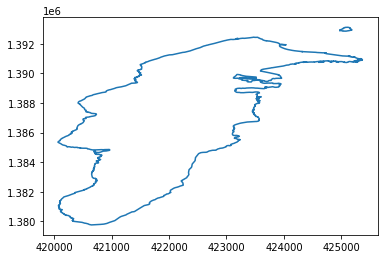

In [14]:
plt.plot(lc[:,0],lc[:,1])

# Configurar archivo

In [20]:
# suavizar batimetria y recortar bordes
# -------------------------------------
kernel = np.ones((1,1))/1.
z_smooth = signal.convolve2d(z, kernel, "same")
z_smooth = np.ma.masked_array(z, mask=np.isnan(z_smooth))
x_new = x.copy()
y_new = y.copy()
z_new = z_smooth.copy()

In [21]:
print(x_new.shape,y_new.shape,z_new.shape)

(199,) (250,) (250, 199)


C:\Users\paula\AppData\Local\Temp\ipykernel_18748\42244599.py:6: UserWarning: The following kwargs were not used by contour: 'interpolation'
  a = ax.contour(x_new, y_new, z_new, colors="k", interpolation='bicubic')


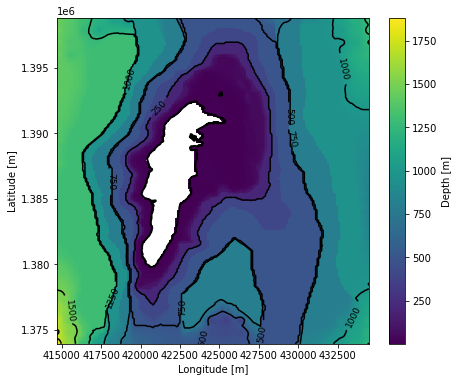

In [22]:
# crear figura
# ------------
fig, ax = plt.subplots(figsize=(7,6))
pc = ax.pcolor(x_new, y_new, z_new)
cb=plt.colorbar(pc)
a = ax.contour(x_new, y_new, z_new, colors="k", interpolation='bicubic')
plt.clabel(a, fontsize=9, inline=1)
plt.xlabel ('Longitude [m]')
plt.ylabel ('Latitude [m]')
ax.plot(lc[:,0], lc[:,1], "-k", lw=2)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth [m]')

C:\Users\paula\AppData\Local\Temp\ipykernel_18748\1719059610.py:3: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cfset = ax.contourf(x_new, y_new, z_new,linewidth=0.5, cmap='Blues')
C:\Users\paula\AppData\Local\Temp\ipykernel_18748\1719059610.py:4: UserWarning: The following kwargs were not used by contour: 'interpolation'
  a = ax.contour(x_new, y_new, z_new, colors="k", alpha=1,  interpolation='bicubic')


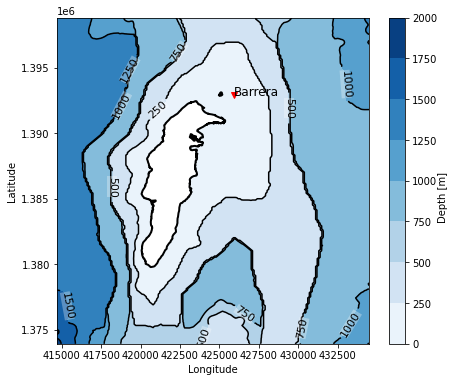

In [23]:
fig, ax = plt.subplots(figsize=(7,6))
#pc = ax.pcolor(x_new, y_new, z_new)
cfset = ax.contourf(x_new, y_new, z_new,linewidth=0.5, cmap='Blues')
a = ax.contour(x_new, y_new, z_new, colors="k", alpha=1,  interpolation='bicubic')
label = plt.clabel(a, fontsize=11, inline=1, fmt = '%1.0f', colors="k")
[txt.set_backgroundcolor('white') for txt in label]
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha = 0.3, pad=0)) for txt in label]
lons = [425915.42]  # Cordenada (latitud) de punto de referencia
lats = [1392890.58] # Cordenada (Longitud) de punto de referencia
for i in range(len(lons)):
	ax.plot(lons[i], lats[i], 'vr', markersize=6)
labels1 = ['Barrera'] # Nombre del punto de referencia
for label1, xpt, ypt in zip(labels1, lons, lats):
    plt.text(xpt-0.04, ypt+0.0085, label1,fontsize=12)  
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
ax.plot(lc[:,0], lc[:,1], "-k", lw=2)
#ax.fill(lc[:,0]+360, lc[:,1], 'g', alpha = 0.3)
cb = plt.colorbar(cfset)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
cb.set_label('Depth [m]', labelpad=0.7, y=0.45)



In [24]:
z_new.shape

(250, 199)

In [25]:
znew2 = z_new[1:,1:]

In [26]:
znew2.shape

(249, 198)

# Guardar archivo .bot

In [22]:
# z_file = znew2.filled(-3.)
# ruta = r"E:\Documentos\Universidad Nacional\MAESTRIA\DELFT3D\PRE_DELFT3D\BATIMETRIA\Bat_250m"
# np.savetxt(ruta+'/bottom250m3.dep',z_file,fmt="%12.4f")


In [23]:
# guardar archivo .bot
# --------------------
z_file = z_new.filled(-3.)
ruta = r"E:\Documentos\Universidad Nacional\MAESTRIA\DELFT3D\PRE_DELFT3D\BATIMETRIA\Bat_200m"
np.savetxt(ruta+'/bottom200m2.dep',z_file,fmt="%12.4f")


In [24]:
z_file[posnany,posnanx]

array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3

In [10]:
# ruta = r"E:\Documentos\Universidad Nacional\MAESTRIA\DELFT3D\PRE_DELFT3D\BATIMETRIA\Bat_200m"
np.savetxt('drypos2.dry',pos+3,fmt="%4.0f") #fmt:primer # espacios, segunda  # cifras despues del puntos